In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [27]:
path_resultados_CW = os.path.join('..', 'resultados', 'resultados_CW.csv')
data_resultados = pd.read_csv(path_resultados_CW)
print(data_resultados.head())

path_zonas = os.path.join('..', '..', "Datos", "zonas_20250115.csv")
data_zonas = pd.read_csv(path_zonas)
data_zonas =data_zonas.drop(columns=[col for col in data_zonas.columns if "Unnamed" in col])
print(data_zonas.head())

   tienda                                              rutas  \
0       1  [[473, 352, 382, 412, 442, 472, 473, 443, 413,...   
1       2  [[1590, 1438, 1468, 1498, 1528, 1558, 1559, 15...   
2       3  [[1521, 1340, 1310, 1311, 1281, 1251, 1252, 12...   
3       4  [[2100, 1710, 1740, 1770, 1800, 1830, 1860, 18...   
4       5  [[2088, 1630, 1601, 1600, 1570, 1540, 1541, 15...   

                                               carga  \
0           [18267016, 71162396, 79738216, 79579833]   
1                                         [73796021]   
2                     [53177483, 65776720, 79320956]   
3           [28498795, 59700901, 79287419, 78771963]   
4  [45885567, 111424091, 126920108, 139503929, 13...   

                            distancia  
0         [12.0, 42.73, 48.49, 48.63]  
1                             [38.06]  
2               [28.49, 33.72, 43.48]  
3        [14.83, 33.72, 43.43, 54.49]  
4  [27.31, 55.14, 63.9, 78.26, 89.76]  
   id_zona  x_zona  y_zona  tienda_zon

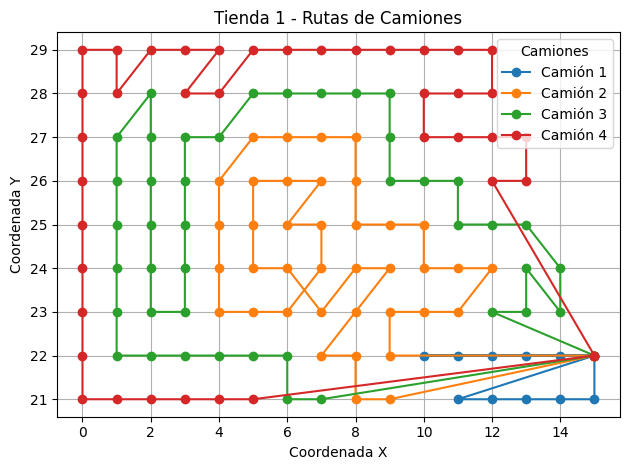

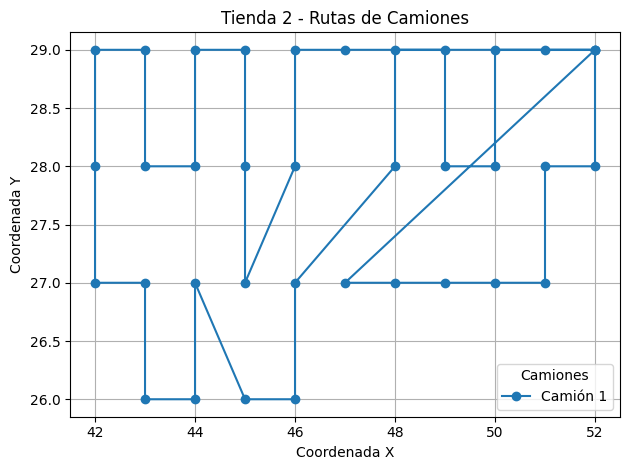

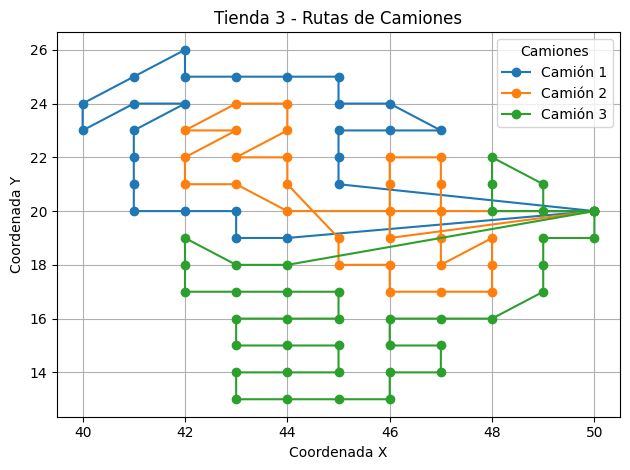

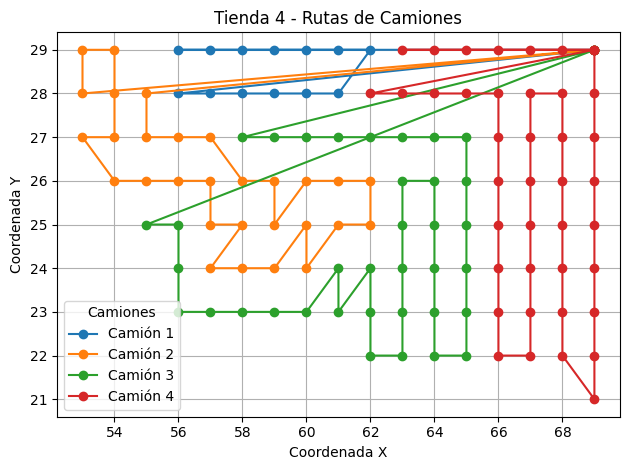

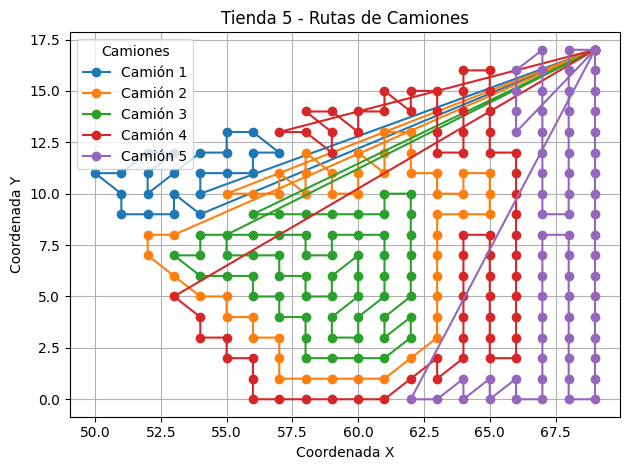

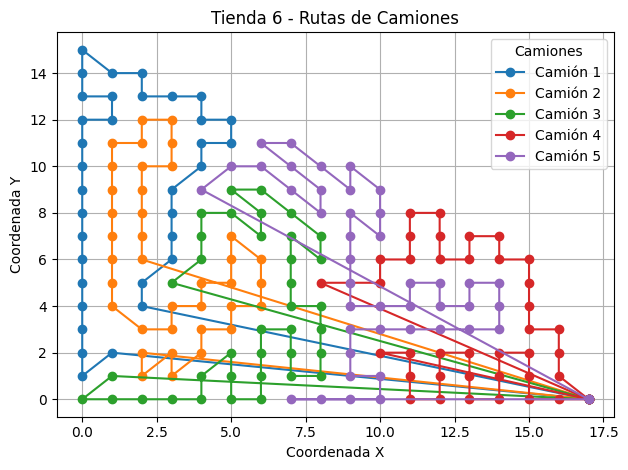

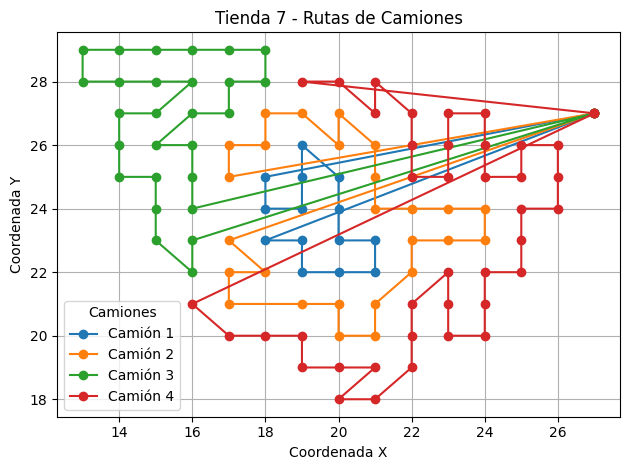

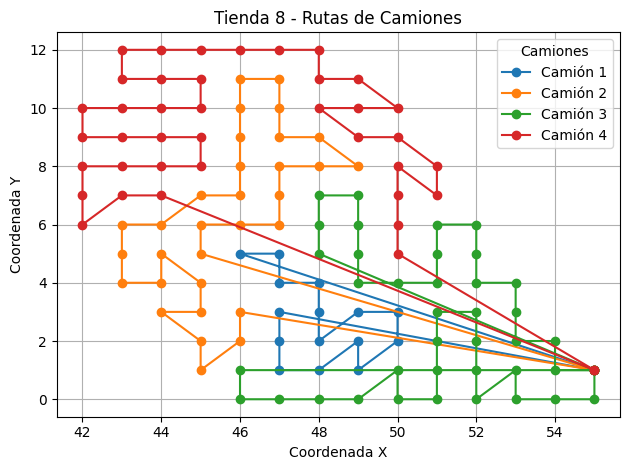

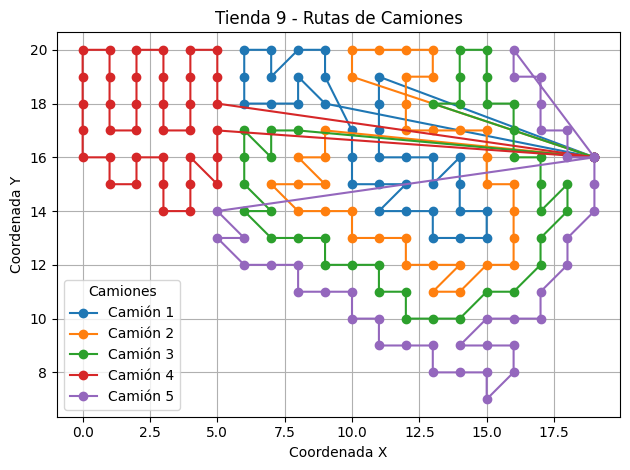

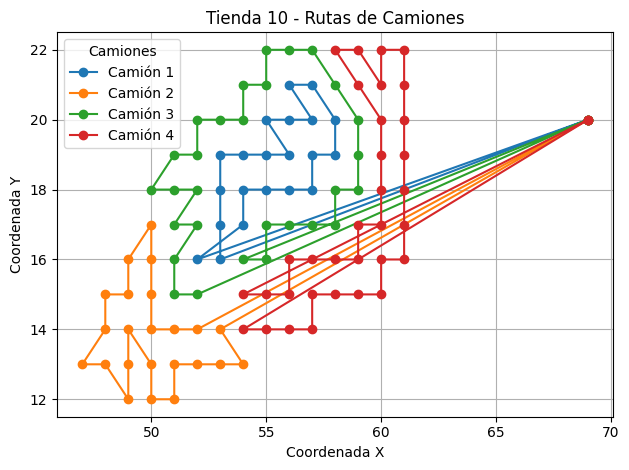

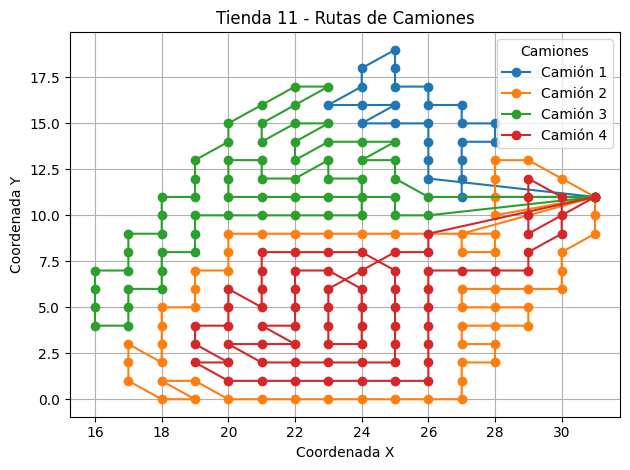

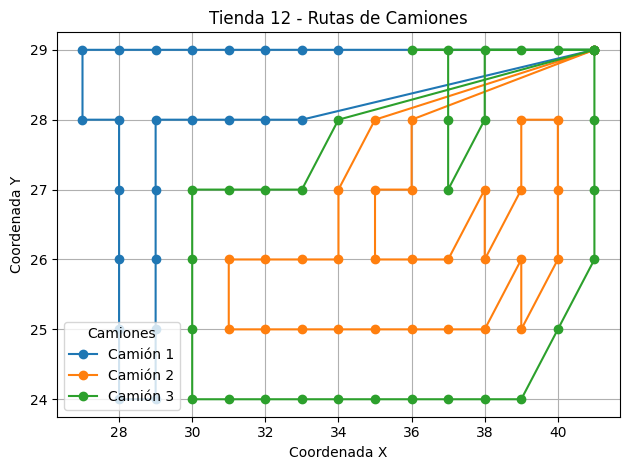

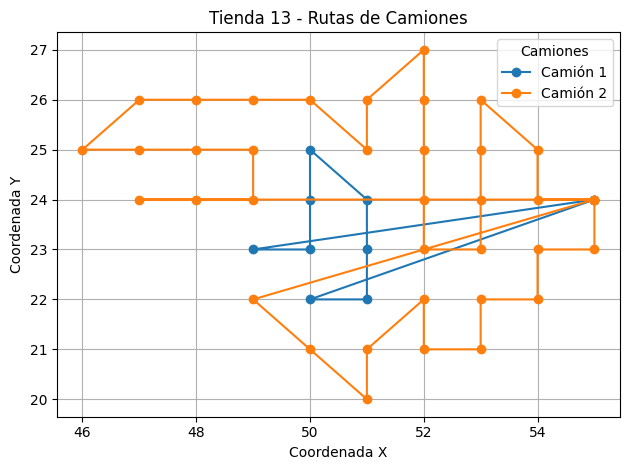

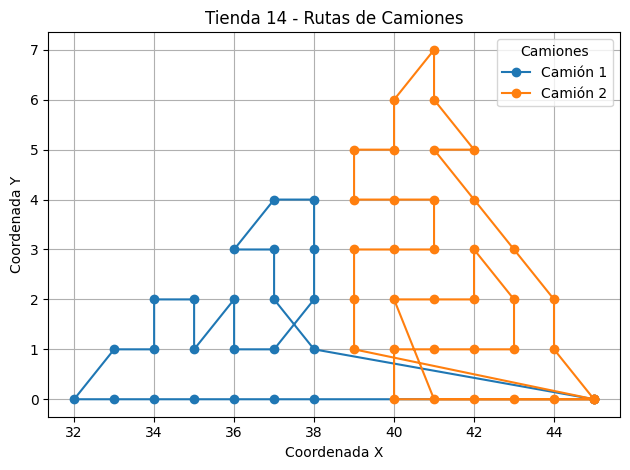

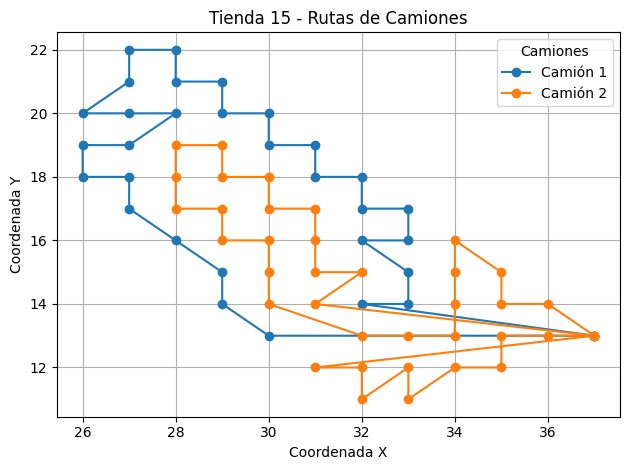

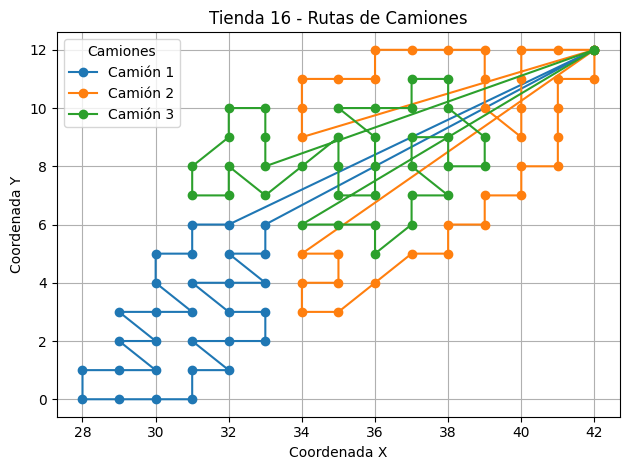

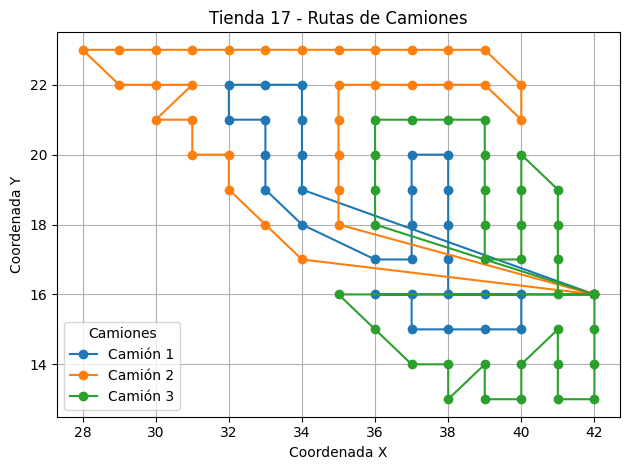

Distancia total: 2345.2


In [42]:
distancia_total = 0
for i, row in data_resultados.iterrows():

    distancias = row['distancia']
    for distancia in distancias.strip("[]").split(','):
        distancia_total += float(distancia)

    rutas = row['rutas']
    rutas = rutas.split("], [")
    for i in range(len(rutas)):
        rutas[i] = rutas[i].strip("[]").split(", ")
        for j in range(len(rutas[i])):
            rutas[i][j] = int(rutas[i][j])
    
    camion = 1
    for ruta in rutas:
        xs_camion = []
        ys_camion = []
        for id_zona in ruta:
            zona = data_zonas.loc[data_zonas['id_zona'] == id_zona]
            xs_camion.append(zona['x_zona'].values[0])
            ys_camion.append(zona['y_zona'].values[0])

        plt.plot(xs_camion, ys_camion, marker='o', label=f'Camión {camion}')
        camion += 1

    plt.title(f'Tienda {row["tienda"]} - Rutas de Camiones')
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.legend(title='Camiones')
    plt.grid(True)
    plt.tight_layout()
    path_graficos_CW = os.path.join('..', 'resultados', 'graficos_CW', f'ruta_CW_tienda_{row["tienda"]}.png')
    plt.savefig(path_graficos_CW)
    plt.show()

    
print(f"Distancia total: {distancia_total}")